In [ ]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict
from scipy.stats.stats import pearsonr

<ipython-input-1-ce188f0da866>:9: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Appunti/TXA/TXA - the Sloop 🏴‍☠️/FINAL/Notebooks/crossed_dataset.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#train_data = scaler.fit_transform(df_train)

In [ ]:
from sklearn.metrics import *
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


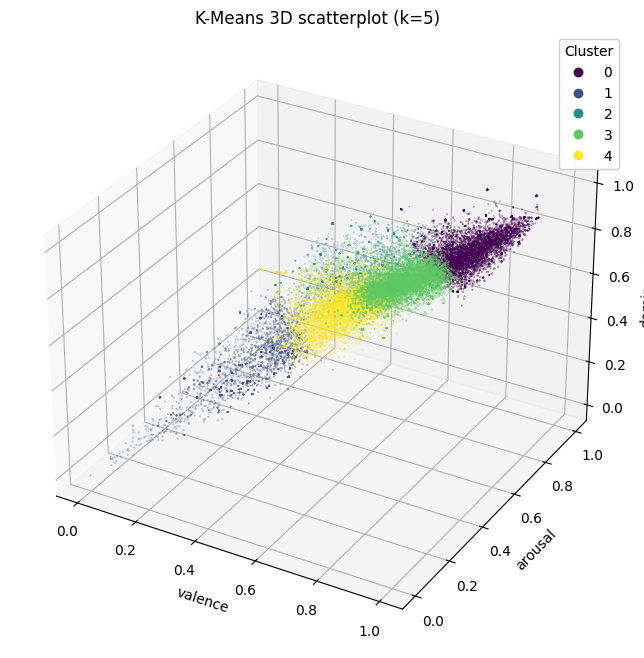

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(df[['valence_tags', 'arousal_tags', 'dominance_tags']])

# Normalizza i dati per la visualizzazione
scaler = MinMaxScaler()
df[['valence_tags', 'arousal_tags', 'dominance_tags']] = scaler.fit_transform(df[['valence_tags', 'arousal_tags', 'dominance_tags']])

# Crea lo scatterplot tridimensionale
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['valence_tags'], df['arousal_tags'], df['dominance_tags'], c=df['cluster'], cmap='viridis', s=0.1)

ax.set_xlabel('valence')
ax.set_ylabel('arousal')
ax.set_zlabel('dominance', rotation=90)


ax.set_title('K-Means 3D scatterplot (k=5)')

# Aggiungi la legenda per i cluster

legend = ax.legend(*scatter.legend_elements(), title='Cluster')
ax.add_artist(legend)

plt.show()
